In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv('car_data.csv')
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,...,Fuel_efficiency,Latest_Launch,Power_perf_factor,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,...,28.0,02-02-2012,58.280150,18,8,307.0,3504,12.0,70,1
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,...,25.0,06-03-2011,91.370778,15,8,350.0,3693,11.5,70,1
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,...,26.0,01-04-2012,NaN,18,8,318.0,3436,11.0,70,1
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,...,22.0,03-10-2011,91.389779,16,8,304.0,3433,12.0,70,1
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,...,27.0,10-08-2011,62.777639,17,8,302.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,...,25.0,9/21/2011,66.498812,19,6,225.0,3264,16.0,75,1
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,...,25.0,11/24/2012,70.654495,18,6,250.0,3459,16.0,75,1
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,...,25.0,6/25/2011,71.155978,15,6,250.0,3432,21.0,75,1
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,...,23.0,4/26/2011,101.623357,15,6,250.0,3158,19.5,75,1


In [10]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.00000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591,19.184713,6.012739,232.073248,3215.191083,14.757962,72.146497,1.43949
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664,5.909382,1.815133,120.030803,967.364627,2.924589,1.462415,0.71913
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.00000
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707,14.000000,4.000000,113.000000,2300.000000,13.000000,71.000000,1.00000
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917,18.000000,6.000000,232.000000,3121.000000,14.500000,72.000000,1.00000
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878,24.000000,8.000000,350.000000,4129.000000,16.500000,73.000000,2.00000
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323,35.000000,8.000000,455.000000,5140.000000,23.500000,75.000000,3.00000


now,dealing with missing/null values

In [11]:
df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
mpg                     0
cylinders               0
displacement            0
weight                  0
acceleration            0
model year              0
origin                  0
dtype: int64

In [12]:
#df = df.drop(["mpg","cylinders","displacement","weight","acceleration","model year","origin","Latest_Launch"],axis=1)

In [13]:
#df=df.drop(["__year_resale_value"],axis=1)

In [14]:
df["Price_in_thousands"].fillna(value=df["Price_in_thousands"].mean(),inplace=True)
df["Engine_size"].fillna(value=df["Engine_size"].mean(),inplace=True)
df["Horsepower"].fillna(value=df["Horsepower"].mean(),inplace=True)
df["Wheelbase"].fillna(value=df["Wheelbase"].mean(),inplace=True)
df["Width"].fillna(value=df["Width"].mean(),inplace=True)
df["Length"].fillna(value=df["Length"].mean(),inplace=True)
df["Fuel_capacity"].fillna(value=df["Fuel_capacity"].mean(),inplace=True)
df["Curb_weight"].fillna(value=df["Curb_weight"].mean(),inplace=True)
df["Power_perf_factor"].fillna(value=df["Power_perf_factor"].mean(),inplace=True)

In [15]:
df["Fuel_efficiency"].fillna(value=df["Fuel_efficiency"].mean(),inplace=True)

In [16]:
dummies = pd.get_dummies(df['Vehicle_type'],drop_first=True)
df = df.drop("Vehicle_type",axis=1)

In [17]:
df = pd.concat([df,dummies],axis=1)

In [18]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,...,Latest_Launch,Power_perf_factor,mpg,cylinders,displacement,weight,acceleration,model year,origin,Passenger
0,Acura,Integra,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,...,02-02-2012,58.280150,18,8,307.0,3504,12.0,70,1,1
1,Acura,TL,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,...,06-03-2011,91.370778,15,8,350.0,3693,11.5,70,1,1
2,Acura,CL,14.114,18.225,27.390755,3.2,225.0,106.9,70.6,192.0,...,01-04-2012,77.043591,18,8,318.0,3436,11.0,70,1,1
3,Acura,RL,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,...,03-10-2011,91.389779,16,8,304.0,3433,12.0,70,1,1
4,Audi,A4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,...,10-08-2011,62.777639,17,8,302.0,3449,10.5,70,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,24.400000,1.9,160.0,100.5,67.6,176.6,...,9/21/2011,66.498812,19,6,225.0,3264,16.0,75,1,1
153,Volvo,S70,15.245,NaN,27.500000,2.4,168.0,104.9,69.3,185.9,...,11/24/2012,70.654495,18,6,250.0,3459,16.0,75,1,1
154,Volvo,V70,17.531,NaN,28.800000,2.4,168.0,104.9,69.3,186.2,...,6/25/2011,71.155978,15,6,250.0,3432,21.0,75,1,1
155,Volvo,C70,3.493,NaN,45.500000,2.3,236.0,104.9,71.5,185.7,...,4/26/2011,101.623357,15,6,250.0,3158,19.5,75,1,1


Finding relation between variables

In [22]:
df.corr()['__year_resale_value']

Manufacturer          -0.191285
Model                 -0.001899
Sales_in_thousands    -0.279034
__year_resale_value    1.000000
Price_in_thousands     0.953816
Engine_size            0.531294
Horsepower             0.769079
Wheelbase             -0.052256
Width                  0.178725
Length                 0.026495
Curb_weight            0.361230
Fuel_capacity          0.325584
Fuel_efficiency       -0.399211
Power_perf_factor      0.827114
mpg                   -0.169897
cylinders              0.189544
displacement           0.222876
weight                 0.176102
acceleration          -0.210389
model year             0.056188
origin                -0.139551
Passenger              0.089360
Name: __year_resale_value, dtype: float64

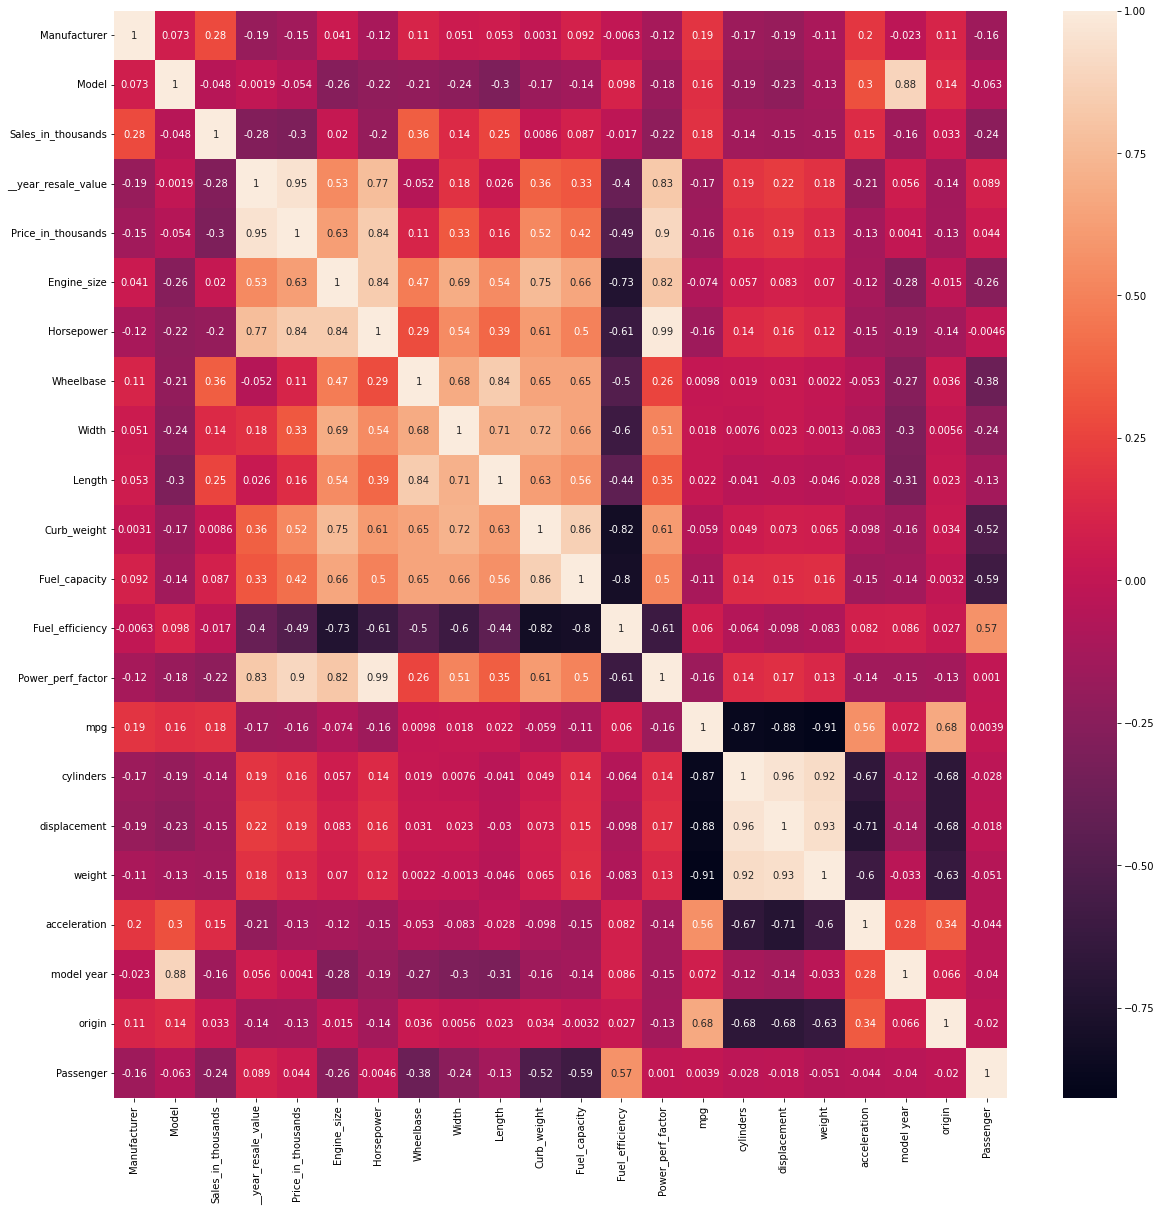

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [24]:
df_sort = df.sort_values(by='Fuel_efficiency',ascending = False)
df_sort

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,...,Latest_Launch,Power_perf_factor,mpg,cylinders,displacement,weight,acceleration,model year,origin,Passenger
26,26,26,21.855,5.160,9.235,1.0,55.0,93.1,62.6,149.4,...,4/13/2012,23.276272,10,8,307.0,4376,15.0,70,1,1
25,26,25,32.299,9.125,13.960,1.8,120.0,97.1,66.7,174.3,...,09-11-2011,48.297636,10,8,360.0,4615,14.0,70,1,1
136,27,119,142.535,10.025,13.108,1.8,120.0,97.0,66.7,174.0,...,04-11-2011,47.968972,16,8,302.0,4141,14.0,74,1,1
130,15,129,24.546,10.590,12.535,1.9,100.0,102.4,66.4,180.0,...,3/16/2011,40.700072,26,4,122.0,2451,16.5,74,1,1
129,15,128,80.620,9.200,10.685,1.9,100.0,102.4,66.4,176.9,...,8/16/2012,39.986425,31,4,79.0,1950,19.0,74,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,27,144,9.835,34.080,51.728,4.7,230.0,112.2,76.4,192.5,...,9/25/2011,102.528984,31,4,76.0,1649,16.5,74,3,0
18,14,16,14.785,NaN,46.225,5.7,255.0,117.5,77.0,201.2,...,4/17/2012,109.509117,27,4,97.0,2130,14.5,70,3,0
41,29,68,16.767,15.510,21.315,3.9,175.0,109.6,78.8,192.6,...,01-06-2012,71.135292,14,8,318.0,4096,13.0,71,1,0
74,18,73,9.126,NaN,60.105,4.7,230.0,112.2,76.4,192.5,...,10/30/2012,105.760458,13,8,302.0,4294,16.0,72,1,0


In [25]:
#df = df.drop(["Curb_weight","Fuel_capacity","Engine_size","Price_in_thousands","Fuel_efficiency"],axis=1)

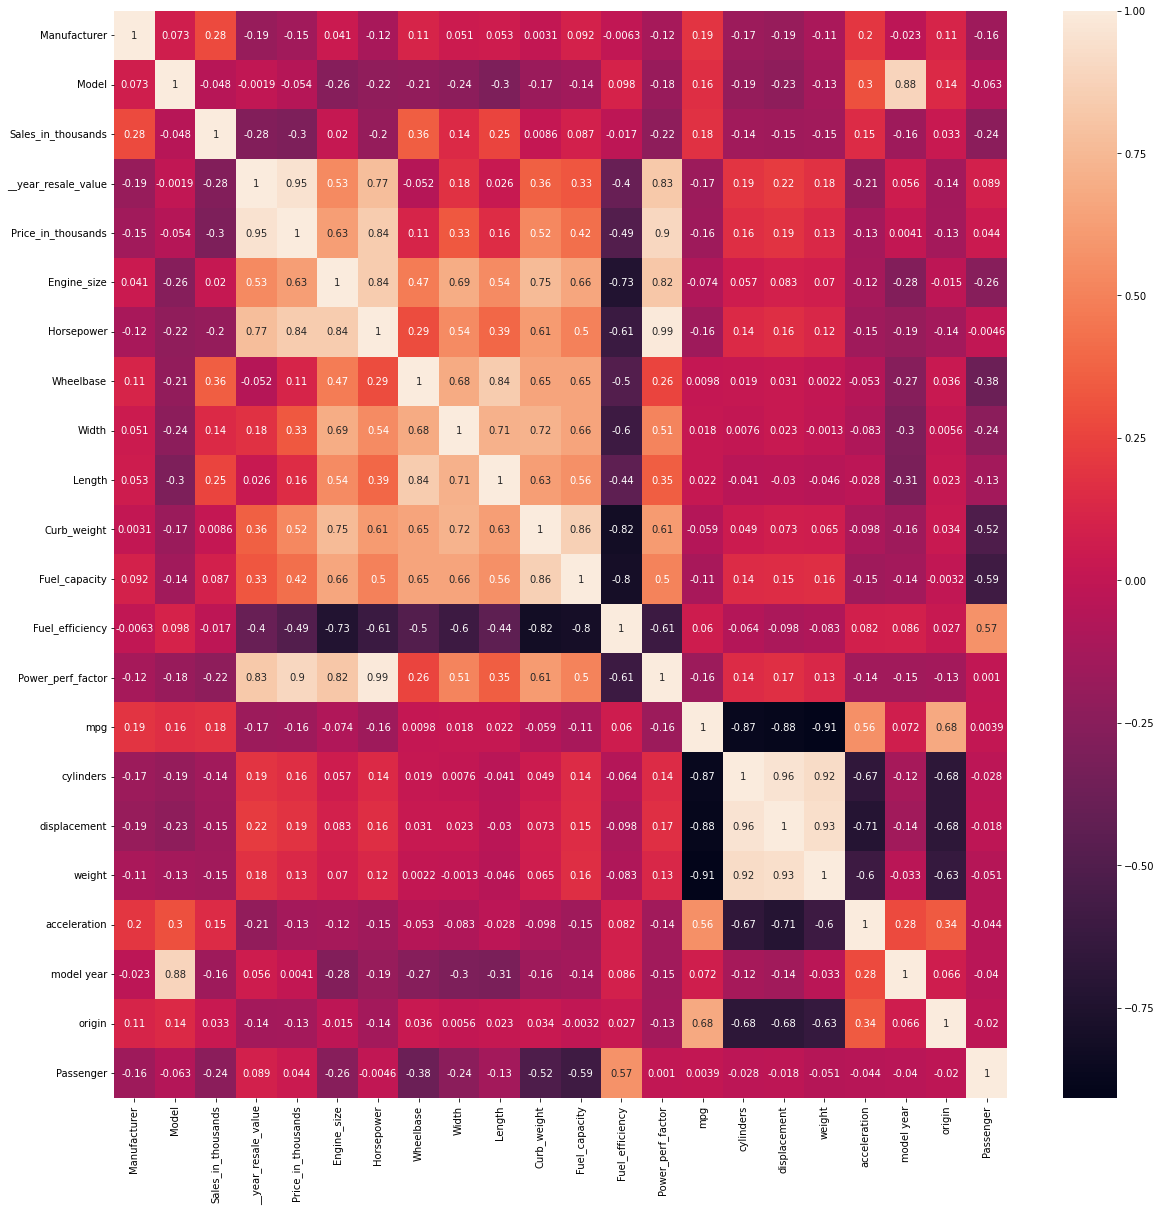

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [20]:
encoded_Model = {k:v for v, k in enumerate(df.Model.value_counts().sort_values().index, 0)}
encoded_Manfacture = {k:v for v, k in enumerate(df.Manufacturer.value_counts().sort_values().index, 0)}

In [21]:
df.Model = df.Model.map(encoded_Model)
df.Manufacturer = df.Manufacturer.map(encoded_Manfacture)

In [30]:
#scaler = StandardScaler()
#df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
#df

In [31]:
x = df.drop("Sales_in_thousands",axis=1)
y=df["Sales_in_thousands"]

In [32]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,...,Latest_Launch,Power_perf_factor,mpg,cylinders,displacement,weight,acceleration,model year,origin,Passenger
0,11,98,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,...,02-02-2012,58.280150,18,8,307.0,3504,12.0,70,1,1
1,11,37,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,...,06-03-2011,91.370778,15,8,350.0,3693,11.5,70,1,1
2,11,2,14.114,18.225,27.390755,3.2,225.0,106.9,70.6,192.0,...,01-04-2012,77.043591,18,8,318.0,3436,11.0,70,1,1
3,11,3,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,...,03-10-2011,91.389779,16,8,304.0,3433,12.0,70,1,1
4,9,4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,...,10-08-2011,62.777639,17,8,302.0,3449,10.5,70,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,20,152,3.545,NaN,24.400000,1.9,160.0,100.5,67.6,176.6,...,9/21/2011,66.498812,19,6,225.0,3264,16.0,75,1,1
153,20,153,15.245,NaN,27.500000,2.4,168.0,104.9,69.3,185.9,...,11/24/2012,70.654495,18,6,250.0,3459,16.0,75,1,1
154,20,137,17.531,NaN,28.800000,2.4,168.0,104.9,69.3,186.2,...,6/25/2011,71.155978,15,6,250.0,3432,21.0,75,1,1
155,20,145,3.493,NaN,45.500000,2.3,236.0,104.9,71.5,185.7,...,4/26/2011,101.623357,15,6,250.0,3158,19.5,75,1,1


In [33]:
df.corr()['Power_perf_factor']

Manufacturer          -0.121107
Model                 -0.183160
Sales_in_thousands    -0.223017
__year_resale_value    0.827114
Price_in_thousands     0.897945
Engine_size            0.818481
Horsepower             0.991464
Wheelbase              0.258847
Width                  0.511982
Length                 0.353956
Curb_weight            0.607312
Fuel_capacity          0.501123
Fuel_efficiency       -0.606664
Power_perf_factor      1.000000
mpg                   -0.164911
cylinders              0.143667
displacement           0.168335
weight                 0.126886
acceleration          -0.144965
model year            -0.145362
origin                -0.134154
Passenger              0.001036
Name: Power_perf_factor, dtype: float64

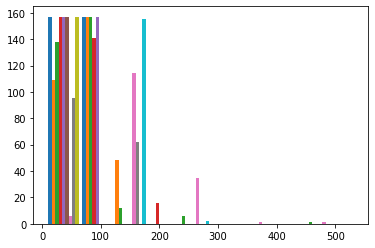

In [39]:
plt.hist(df,bins=5)
plt.show()

Manufacturer
-0.5307072128679513


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


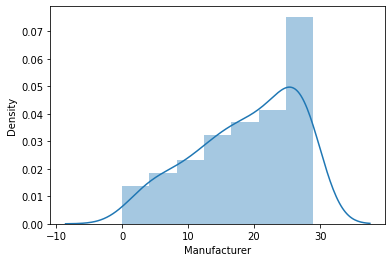

Model
-0.0008120750860142306


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


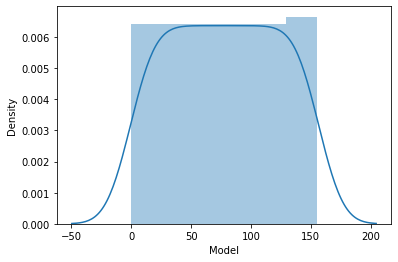

Sales_in_thousands
3.375866090661253


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


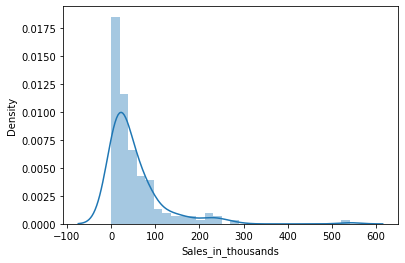

__year_resale_value
2.5815913199258973


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


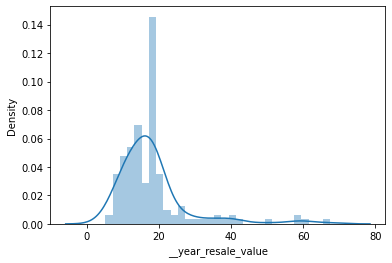

Price_in_thousands
1.7598455708699938


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


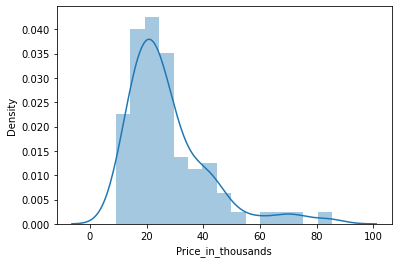

Engine_size
1.0933252193115957


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


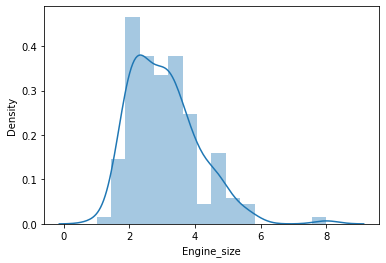

Horsepower
0.9942184675331993


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


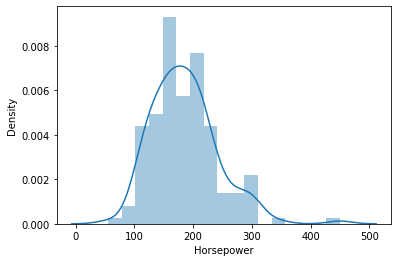

C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Wheelbase
0.9636582075665935


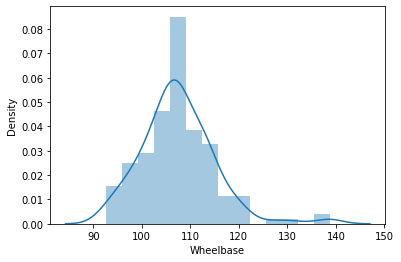

C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Width
0.4807305013986908


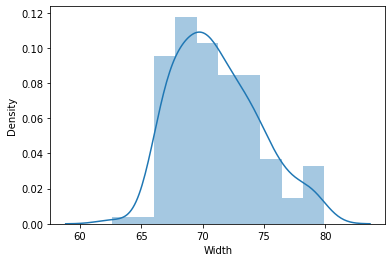

Length
-0.05866467047732647


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


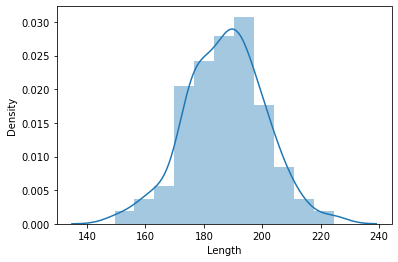

C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Curb_weight
0.7057965181234173


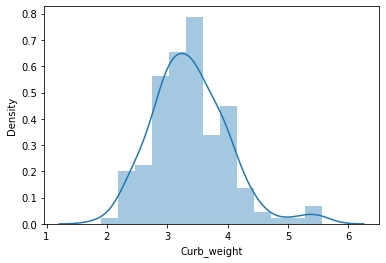

Fuel_capacity
1.1293555731825977


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


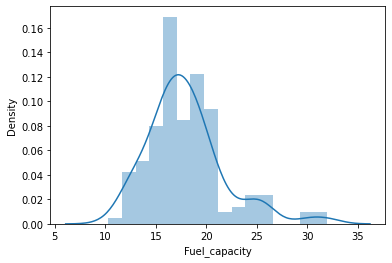

Fuel_efficiency
0.69221135876881


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


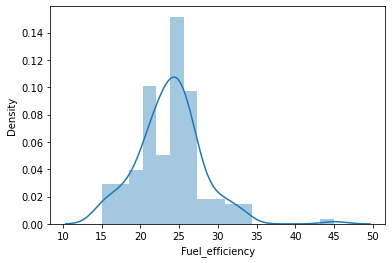

Power_perf_factor
1.0670643990646227


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


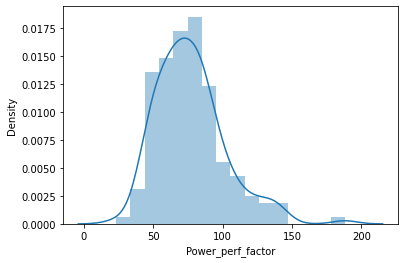

Passenger
-1.0875277323107644


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


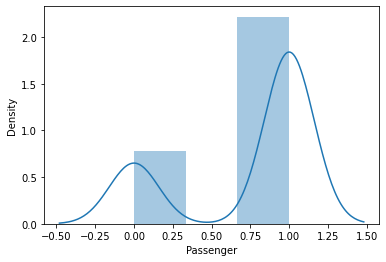

In [40]:
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [41]:
df["Engine_size"]=np.sqrt(df["Engine_size"])
df["Horsepower"]=np.sqrt(df["Horsepower"])
df["Fuel_capacity"]=np.sqrt(df["Fuel_capacity"])

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

<AxesSubplot:>

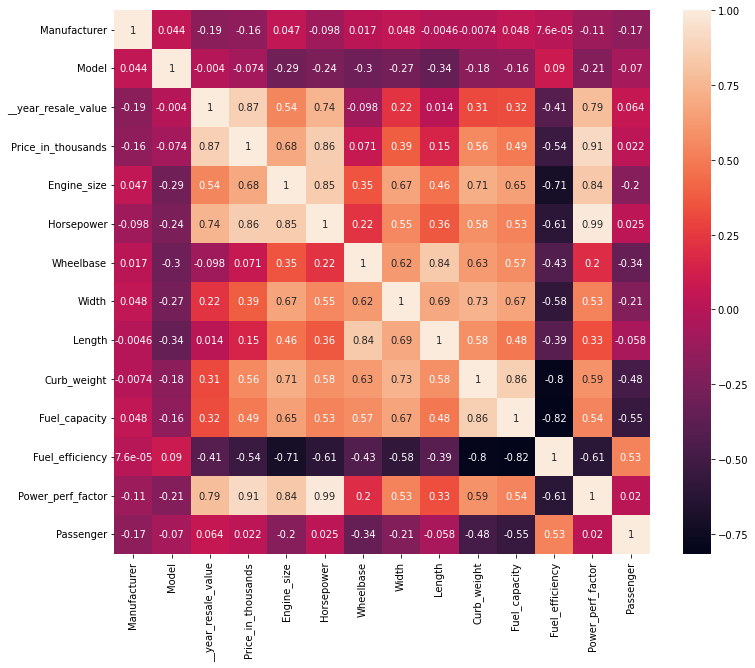

In [43]:
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor,annot=True)

In [44]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [45]:
corr_features  = correlation(x_train,0.7)
len(corr_features)

6

In [46]:
corr_features

{'Curb_weight',
 'Fuel_capacity',
 'Horsepower',
 'Length',
 'Power_perf_factor',
 'Price_in_thousands'}

In [47]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,Manufacturer,Model,__year_resale_value,Engine_size,Wheelbase,Width,Fuel_efficiency,Passenger
117,12,116,18.072975,3.5,113.3,76.3,21.000000,1
75,18,74,18.072975,3.0,103.0,71.5,21.000000,0
51,28,50,14.210000,4.6,114.7,78.2,21.000000,1
31,22,31,12.640000,2.0,108.0,71.0,27.000000,1
35,29,155,7.750000,2.0,105.0,74.4,29.000000,1
40,29,66,15.060000,5.2,138.7,79.3,17.000000,0
14,14,14,22.525000,4.6,115.3,74.5,22.000000,1
109,19,107,18.072975,3.5,109.0,73.6,23.844156,1
53,28,52,13.175000,3.0,120.7,76.6,21.000000,0
147,21,139,16.725000,1.8,106.4,68.5,27.000000,1


In [48]:
df['__year_resale_value'].fillna(value = df['__year_resale_value'].mean(),inplace=True)

In [49]:
#scaler = StandardScaler()
#x_train = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
#x_test = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [50]:
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.28863902717071144

In [51]:
model2 = RandomForestRegressor()
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.2648619650322883

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV

In [91]:
def perfect_model(X, y):
    model_algo = {
      
      'Linear_Regression':{
          'model': LinearRegression(),
          'params': {}
        },

        'Decision_Tree':{
            'model': DecisionTreeRegressor(random_state=42),
            'params': {
                'criterion': ['squared_error','friedman_mse','absolute_error'],
                'splitter': ['best', 'random'],
                'max_depth': [x for x in range(5,40,5)],
                'min_samples_leaf': [1, 2, 5]
            }
        },

        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': np.random.randint(20,151,size=5),
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10,100],
                'min_samples_leaf': [1, 2]
            }
        }
    }
  
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in model_algo.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_iter=5)
        rs.fit(x_train,y_train)
        score.append({
          'model': algo_name,
          'best_score': rs.best_score_,
          'best_params': rs.best_params_
      })

    result = pd.DataFrame(score,columns=['model','best_score','best_params'])
    print(result.best_params.tolist())
    return result

In [92]:
perfect_model(x,y)

C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[{}, {'splitter': 'best', 'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'friedman_mse'}, {'n_estimators': 34, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 25}]


,model,best_score,best_params
0,Linear_Regression,-52.499099,{}
1,Decision_Tree,-1.024584,"{'splitter': 'best', 'min_samples_leaf': 5, 'm..."
2,Random_forest,-0.318255,"{'n_estimators': 34, 'min_samples_split': 2, '..."


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


algos = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha":np.arange(0.1, 1, 0.01)
        }
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(),
        "params": {
            "criterion": ["mse", "friedman_mse"],
            "splitter": ["best", "random"],
            "max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],
            "min_samples_split": [2, 4, 6, 8, 10, 15, 20],
            "min_samples_leaf": [i for i in range(1, 11)],
            "max_leaf_nodes": [None] + [i for i in range(10, 91, 10)],
            "max_features": ["auto", "log2", "sqrt", None]            
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [100, 200, 300],
            "criterion": ["mse", "friedman_mse"],
            "max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],
            "min_samples_split": [2, 4, 6, 8, 10, 15, 20],
            "min_samples_leaf": [i for i in range(1, 11)],
            "max_leaf_nodes": [None] + [i for i in range(10, 91, 10)],
            "max_features": ["auto", "log2", "sqrt", None]
        }
    },
    "Gradient Boost": {
        "model": GradientBoostingRegressor(),
        "params": {
            "learning_rate": np.arange(0.1, 1, 0.01),
            "n_estimators": [100, 200, 300],
            "criterion": ['friedman_mse', 'mse'],
            "min_samples_split": [2, 4, 6, 8, 10, 15, 20],
            "min_samples_leaf": [i for i in range(1, 11)],
            "max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],
            "max_features": ["auto", "log2", "sqrt", None],
            "max_leaf_nodes": [None] + [i for i in range(10, 91, 10)],
            "alpha": np.arange(0.1, 1, 0.01)
        }
    }
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import time

start_time = time.time()
best_model = {}
best_model_details = []
try:
    for model_name, values in algos.items():
        rscv = RandomizedSearchCV(values["model"], values["params"], cv=5, n_iter=15, n_jobs=-1, verbose=2, random_state=4)
        rscv.fit(x_train_scaled, y_train)
        print("---fitted---")
        best_model[model_name] = rscv
        best_model_details.append({"Model Name": model_name, "Best Score": rscv.best_score_, "Best Parameters": rscv.best_params_})
        print(model_name)
except OverflowError as oe:
    print("after the overflow",oe)
finally:
    print("--------------------------------------------------------")
    print(f"it takes {(time.time() - start_time) / 60} minutes")
    print("--------------------------------------------------------")

In [ ]:
test_model = []

for model_name, model in best_model.items():
    test_model.append({"Model Name": model_name, "Test Score": model.score(x_test, y_test)})

pd.DataFrame(test_model)

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(best_model_details)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_model_error = []
test_model_error = []

for model_name, model in best_model.items():
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)

    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = np.sqrt(test_mse)
    
    train_model_error.append({"Model Name": model_name, "Mean Absolute Error": train_mae, "Mean Squared Error": train_mse, "Root Mean Squared Error": train_rmse})
    test_model_error.append({"Model Name": model_name, "Mean Absolute Error": test_mae, "Mean Squared Error": test_mse, "Root Mean Squared Error": test_rmse})
    

train_errors = pd.DataFrame(train_model_error)
test_errors = pd.DataFrame(test_model_error)

In [ ]:
train_errors

In [ ]:
test_errors

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


algos = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha":np.arange(0.1, 1, 0.01)
        }
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            "alpha": np.arange(0.1, 1, 0.01)
        }
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(),
        "params": {
            "criterion": ["mse", "friedman_mse"],
            "splitter": ["best", "random"],
            "max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],
            "min_samples_split": [2, 4, 6, 8, 10, 15, 20],
            "min_samples_leaf": [i for i in range(1, 11)],
            "max_leaf_nodes": [None] + [i for i in range(10, 91, 10)],
            "max_features": ["auto", "log2", "sqrt", None]            
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [100, 200, 300],
            "criterion": ["mse", "friedman_mse"],
            "max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],
            "min_samples_split": [2, 4, 6, 8, 10, 15, 20],
            "min_samples_leaf": [i for i in range(1, 11)],
            "max_leaf_nodes": [None] + [i for i in range(10, 91, 10)],
            "max_features": ["auto", "log2", "sqrt", None]
        }
    },
    "Ada Boost": {
        "model": AdaBoostRegressor(),
        "params": {
            "n_estimators": [100, 200, 300],
            "learning_rate": np.arange(0.1, 1, 0.01),
            "loss": ['linear', 'square', 'exponential']
        }
    },
    "Gradient Boost": {
        "model": GradientBoostingRegressor(),
        "params": {
            "learning_rate": np.arange(0.1, 1, 0.01),
            "n_estimators": [100, 200, 300],
            "criterion": ['friedman_mse', 'mse'],
            "min_samples_split": [2, 4, 6, 8, 10, 15, 20],
            "min_samples_leaf": [i for i in range(1, 11)],
            "max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],
            "max_features": ["auto", "log2", "sqrt", None],
            "max_leaf_nodes": [None] + [i for i in range(10, 91, 10)],
            "alpha": np.arange(0.1, 1, 0.01)
        }
    }
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import time

start_time = time.time()
best_model = {}
best_model_details = []
try:
    for model_name, values in algos.items():
        rscv = RandomizedSearchCV(values["model"], values["params"], cv=5, n_iter=15, n_jobs=-1, verbose=2, random_state=4)
        rscv.fit(x_train, y_train)
        print("---fitted---")
        best_model[model_name] = rscv
        best_model_details.append({"Model Name": model_name, "Best Score": rscv.best_score_, "Best Parameters": rscv.best_params_})
        print(model_name)
except OverflowError as oe:
    print("after the overflow",oe)
finally:
    print("--------------------------------------------------------")
    print(f"it takes {(time.time() - start_time) / 60} minutes")
    print("--------------------------------------------------------")

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(best_model_details)

In [ ]:
test_model = []

for model_name, model in best_model.items():
    test_model.append({"Model Name": model_name, "Test Score": model.score(x_test, y_test)})

pd.DataFrame(test_model)